In [37]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Load data
df = pd.read_csv('CVD_cleaned.csv')

In [39]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 
                                         'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 
                                         'Arthritis', 'Sex', 'Age_Category', 'Smoking_History'], drop_first=True)

In [40]:
# Normalize the numerical columns
scaler = StandardScaler()
numerical_columns = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 
                     'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

In [41]:
df.head

<bound method NDFrame.head of        General_Health                  Checkup Exercise Heart_Disease  \
0                Poor  Within the past 2 years       No            No   
1           Very Good     Within the past year       No           Yes   
2           Very Good     Within the past year      Yes            No   
3                Poor     Within the past year      Yes           Yes   
4                Good     Within the past year       No            No   
...               ...                      ...      ...           ...   
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the past year      Yes            No   
308853      Excellent     Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
0               No           No         No   
1

In [42]:
print(df.dtypes)

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object


In [50]:
# Apply KMeans clustering (with n_init set to avoid future warning)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_encoded['cluster'] = kmeans.fit_predict(df_encoded)

In [51]:
# Analyze the clusters
print(df_encoded['cluster'].value_counts())

cluster
0    143786
1    124296
2     40772
Name: count, dtype: int64


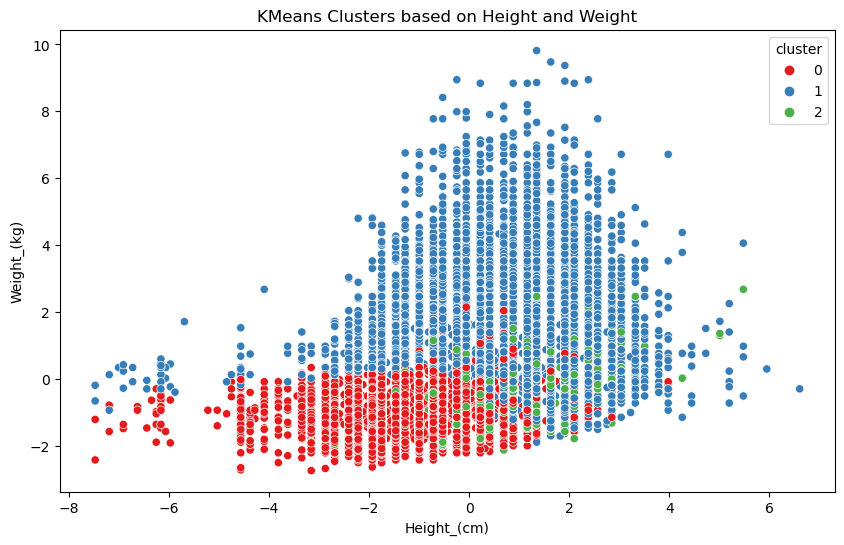

In [52]:
# Visualize the clusters based on Height and Weight
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_encoded, x='Height_(cm)', y='Weight_(kg)', hue='cluster', palette='Set1')
plt.title('KMeans Clusters based on Height and Weight')
plt.show()

In [53]:
# Look at the cluster profiles to understand what characteristics define each cluster
cluster_profiles = df_encoded.groupby('cluster').mean()
print(cluster_profiles)

         Height_(cm)  Weight_(kg)       BMI  Alcohol_Consumption  \
cluster                                                            
0          -0.590995    -0.641578 -0.412516            -0.335309   
1           0.569980     0.784688  0.582989            -0.333354   
2           0.346574    -0.129589 -0.322502             2.198745   

         Fruit_Consumption  Green_Vegetables_Consumption  \
cluster                                                    
0                 0.262031                      0.179264   
1                -0.264304                     -0.227264   
2                -0.118325                      0.060639   

         FriedPotato_Consumption  General_Health_Fair  General_Health_Good  \
cluster                                                                      
0                      -0.180194             0.103849             0.283672   
1                       0.195932             0.145097             0.352473   
2                       0.038162             0

In [54]:
# Step 4: Analyze the clusters
print(df_encoded['cluster'].value_counts())

cluster
0    143786
1    124296
2     40772
Name: count, dtype: int64


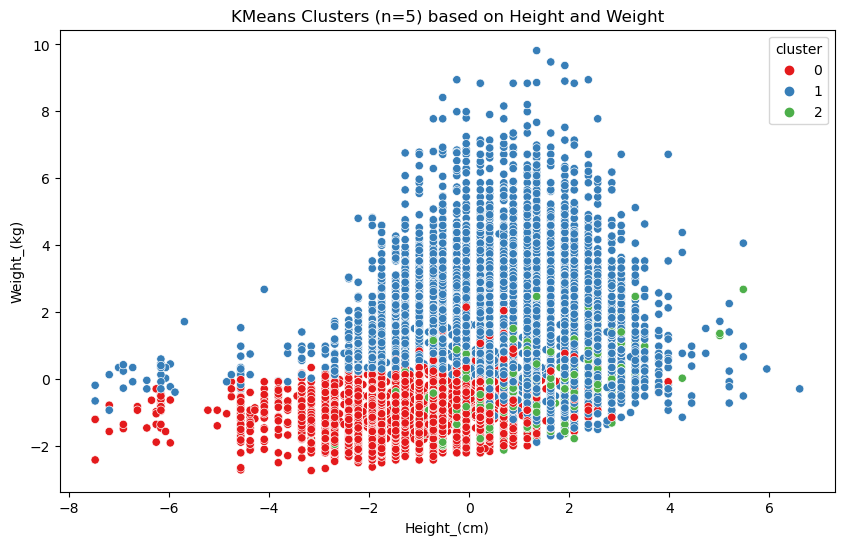

In [55]:
# Step 5: Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_encoded, x='Height_(cm)', y='Weight_(kg)', hue='cluster', palette='Set1')
plt.title(f'KMeans Clusters (n={optimal_clusters}) based on Height and Weight')
plt.show()

In [56]:
# Step 6: Look at the cluster profiles
cluster_profiles = df_encoded.groupby('cluster').mean()
print(cluster_profiles)

         Height_(cm)  Weight_(kg)       BMI  Alcohol_Consumption  \
cluster                                                            
0          -0.590995    -0.641578 -0.412516            -0.335309   
1           0.569980     0.784688  0.582989            -0.333354   
2           0.346574    -0.129589 -0.322502             2.198745   

         Fruit_Consumption  Green_Vegetables_Consumption  \
cluster                                                    
0                 0.262031                      0.179264   
1                -0.264304                     -0.227264   
2                -0.118325                      0.060639   

         FriedPotato_Consumption  General_Health_Fair  General_Health_Good  \
cluster                                                                      
0                      -0.180194             0.103849             0.283672   
1                       0.195932             0.145097             0.352473   
2                       0.038162             0

In [57]:
# Optional: Try different numbers of clusters to further analyze
kmeans_more_clusters = KMeans(n_clusters=5, random_state=42, n_init=10)
df_encoded['cluster_5'] = kmeans_more_clusters.fit_predict(df_encoded)

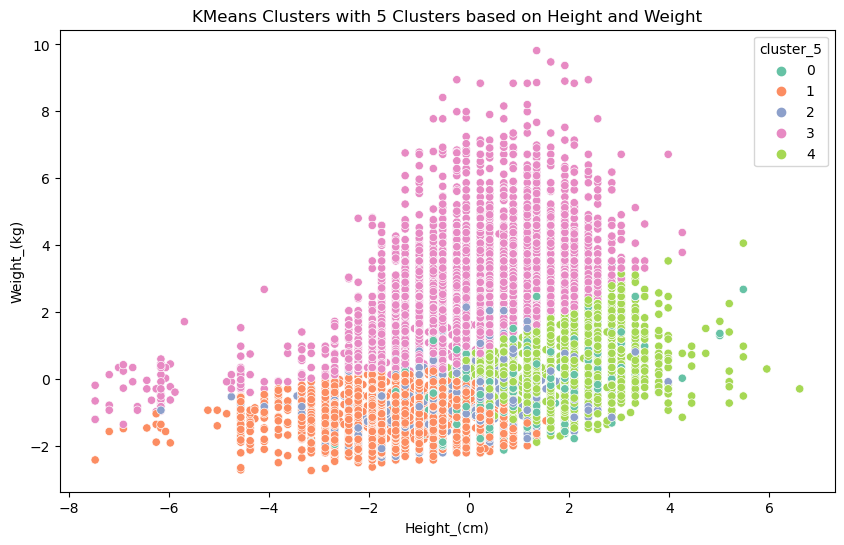

In [58]:
# Visualize the new clusters based on Height and Weight
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_encoded, x='Height_(cm)', y='Weight_(kg)', hue='cluster_5', palette='Set2')
plt.title('KMeans Clusters with 5 Clusters based on Height and Weight')
plt.show()

In [59]:
# Analyze the clusters with 5 clusters
print(df_encoded['cluster_5'].value_counts())

cluster_5
1    102500
4     77246
3     46388
2     41992
0     40728
Name: count, dtype: int64


In [60]:
# Look at the cluster profiles with 5 clusters
cluster_profiles_5 = df_encoded.groupby('cluster_5').mean()
print(cluster_profiles_5)

           Height_(cm)  Weight_(kg)       BMI  Alcohol_Consumption  \
cluster_5                                                            
0             0.345937    -0.129816 -0.322443             2.198229   
1            -0.730430    -0.720279 -0.433368            -0.369536   
2            -0.213715    -0.416812 -0.348498            -0.246067   
3            -0.026814     1.498763  1.716873            -0.343784   
4             0.919115     0.350748 -0.096516            -0.328454   

           Fruit_Consumption  Green_Vegetables_Consumption  \
cluster_5                                                    
0                  -0.120875                      0.054810   
1                  -0.282876                     -0.203167   
2                   1.624850                      1.149918   
3                  -0.212333                     -0.226620   
4                  -0.316692                     -0.248332   

           FriedPotato_Consumption  General_Health_Fair  General_Health_Go